# Twitter Sentiment Analysis

Introduction
In today’s digital age, social media platforms like Twitter serve as a vital space for customers to express their opinions and sentiments regarding products and brands. As consumers increasingly turn to these platforms to voice their experiences, understanding the sentiment behind their tweets becomes crucial for businesses. This sentiment analysis project aims to analyze tweets related to Apple and Google products to gauge public perception, identify trends, and inform strategic decision-making. By employing advanced natural language processing (NLP) techniques, we can extract valuable insights from the vast volume of unstructured text data, enabling companies to enhance customer satisfaction and adapt to market demands effectively.

Objectives

1. Understanding Customer Sentiment:

To analyze the sentiment of tweets regarding Apple and Google products, providing a clear understanding of how consumers perceive these brands.

2. Identifying Trends:

To identify key trends and patterns in consumer sentiment over time, which can inform product development and marketing strategies.

3. Improving Brand Strategy:

To offer actionable insights that can help Apple and Google refine their customer engagement strategies, enhance product offerings, and address customer concerns effectively.

4. Developing a Sentiment Classification Model:

To build and validate a robust sentiment classification model that accurately categorizes tweets as positive, negative, or neutral.

5. Enhancing Decision-Making:

To equip stakeholders with data-driven insights that support strategic decision-making and improve overall customer satisfaction and brand loyalty.

# Data Preparation and cleaning


In [2]:
import pandas as pd

# Load the dataset
file_path = '../data/judge-1377884607_tweet_product_company.csv'
print(file_path)
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df.head()

../data/judge-1377884607_tweet_product_company.csv


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


The dataset contains the following columns:

tweet_text: The actual tweet content.

emotion_in_tweet_is_directed_at: The product or brand the tweet refers to (e.g., iPhone, iPad, Google).

is_there_an_emotion_directed_at_a_brand_or_product: The sentiment associated with the tweet, either "Positive emotion" or "Negative emotion."

# 1.2 check dataset information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


The dataset has 4 columns 
1. tweeet_text, 
2. emotion_in tweet_is_directed_at,
3. is_there_an_emotion_directed_at_a_brand-or_product
4. classification

# 1.3 Check for duplicates

In [4]:
# check for duplicate rows i the dataset based on the tweet content
duplicate_rows = df[df.duplicated(subset='tweet_text')]

# Display the number of duplicate rows and some of the duplicates (if any)
print(f"Number of duplicate rows: {len(duplicate_rows)}")

Number of duplicate rows: 27


# 1.4 Check for missing values

In [6]:
# Check for missing values
df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5786
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

# 1.5 Check for unique values

In [7]:
# Check for unique values in each column
print(df.nunique())

tweet_text                                            9065
emotion_in_tweet_is_directed_at                          9
is_there_an_emotion_directed_at_a_brand_or_product       4
dtype: int64


# 1.6 Visualize on target distribution


Target Variable Distribution:
No emotion toward brand or product    5373
Positive emotion                      2968
Negative emotion                       569
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64


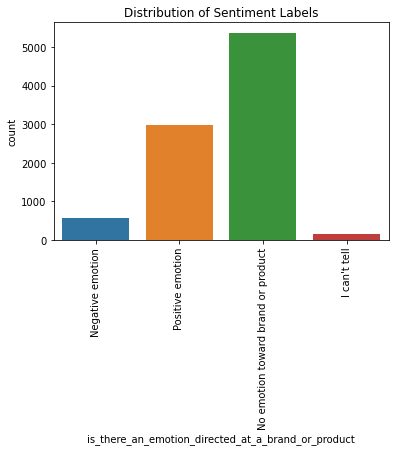

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Checking the distribution of the target variable
print("\nTarget Variable Distribution:")
print(df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts())

# Visualizing the target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='is_there_an_emotion_directed_at_a_brand_or_product', data=df)
plt.title('Distribution of Sentiment Labels')
plt.xticks(rotation=90)
plt.show()

No emotion towards brand or product column has the most number of sentiments.

# 1.7 Visualize distribution of brands and products


Distribution of Products/Brands:
iPad                               943
Apple                              659
iPad or iPhone App                 469
Google                             428
iPhone                             296
Other Google product or service    293
Android App                         80
Android                             77
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64


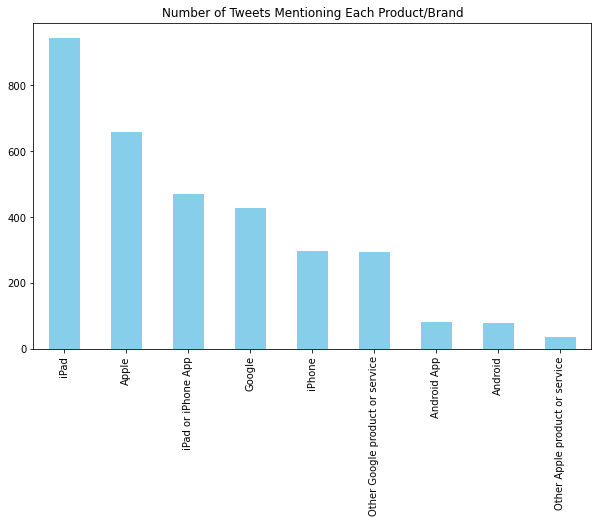

In [9]:
# Distribution of products/brands mentioned in the tweets
print("\nDistribution of Products/Brands:")
print(df['emotion_in_tweet_is_directed_at'].value_counts())

# Visualizing product mentions
plt.figure(figsize=(10,6))
df['emotion_in_tweet_is_directed_at'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Tweets Mentioning Each Product/Brand')
plt.xticks(rotation=90)
plt.show()

Ipad and apple has the most number of tweets mentioned towards product or brand.

# 1.8 Changing column names

In [10]:
# Rename the columns
df.rename(columns={
    'tweet_text': 'tweet',
    'emotion_in_tweet_is_directed_at': 'product',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'target'
}, inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9066 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tweet    9065 non-null   object
 1   product  3280 non-null   object
 2   target   9066 non-null   object
dtypes: object(3)
memory usage: 603.3+ KB
None


In [11]:
df['product'].value_counts()

iPad                               943
Apple                              659
iPad or iPhone App                 469
Google                             428
iPhone                             296
Other Google product or service    293
Android App                         80
Android                             77
Other Apple product or service      35
Name: product, dtype: int64

In [12]:
# impute missing values in the product with unknown
df['product'] = df['product'].fillna('unknown')

In [14]:
# check for missing values after cleaning
df_cleaned.isnull().sum()

tweet      0
product    0
target     0
dtype: int64

# 1.9 Handling missing tweets

In [13]:
# Drop rows where the tweet_text is missing
df_cleaned = df.dropna(subset=['tweet'])

# 1.10 Drop unnecessary rows

In [16]:
df_cleaned['target'].value_counts()

No emotion toward brand or product    5372
Positive emotion                      2968
Negative emotion                       569
I can't tell                           156
Name: target, dtype: int64

In [17]:
# Drop rows where the target is "I can't tell"
df_cleaned= df_cleaned[df_cleaned['target'] != "I can't tell"]

In [18]:
# Define a mapping for the target values
mapping = {
    'No emotion toward brand or product': 'Neutral',
    'Positive emotion': 'Positive',
    'Negative emotion': 'Negative'
}

# Replace the values in the target column
df_cleaned['target'] = df_cleaned['target'].map(mapping)

In [19]:
df_cleaned['target'].value_counts()

Neutral     5372
Positive    2968
Negative     569
Name: target, dtype: int64

# Data preprocessing

In [20]:
# Text cleaning: Remove
import re
import string
import nltk
from nltk.corpus import stopwords

# Download the stopwords from NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if isinstance(text, str):  # Proceed only if the input is a string
        text = text.lower()  # convert to lowercase
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
        text = re.sub(r'@\w+', '', text)  # Remove mentions
        text = re.sub(r'#', '', text)  # Remove hashtags
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
        text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
        text = text.strip()  # Strip leading/trailing whitespace
    else:
        text = ''  # If not a string, return an empty string
    return text
    
# Apply the cleaning function to the 'tweet_text' column
df_cleaned['clean_text'] = df['tweet'].apply(clean_text)

# Preview cleaned tweets
print(df_cleaned[['tweet', 'clean_text']].head())

                                               tweet  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

                                          clean_text  
0  g iphone hrs tweeting riseaustin dead need upg...  
1  know awesome ipadiphone app youll likely appre...  
2                           wait ipad also sale sxsw  
3  hope years festival isnt crashy years iphone a...  
4  great stuff fri sxsw marissa mayer google tim ...  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Catherine\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Handling missing values


In [21]:
# Check for missing values in the dataset
print(df_cleaned.isnull().sum())

# Drop rows where 'tweet' is missing
df_cleaned = df_cleaned.dropna(subset=['tweet'])

tweet         0
product       0
target        0
clean_text    0
dtype: int64


# Tokenization and vectorization

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', ngram_range=(1, 2))

# Fit and transform the 'clean_text' column
X = tfidf_vectorizer.fit_transform(df_cleaned['clean_text'])

# Display the TF-IDF features
print(X.shape)  # Check the shape of the feature matrix

(8909, 1000)


# Label Encoding for sentiment

In [25]:
from sklearn.preprocessing import LabelEncoder

# Encode target: Positive = 1, Negative = 0, 
label_encoder = LabelEncoder()
df_cleaned['target_label'] = label_encoder.fit_transform(df_cleaned['target']) 

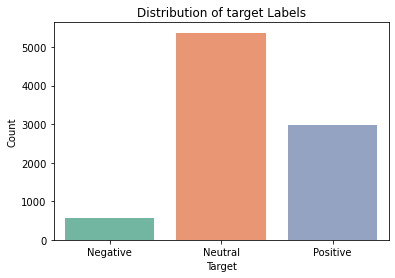

In [26]:
import matplotlib.pyplot as plt

# Visualize the distribution of sentiment labels
sns.countplot(x='target_label', data=df_cleaned, palette='Set2')
plt.title('Distribution of target Labels')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=label_encoder.classes_)
plt.show()

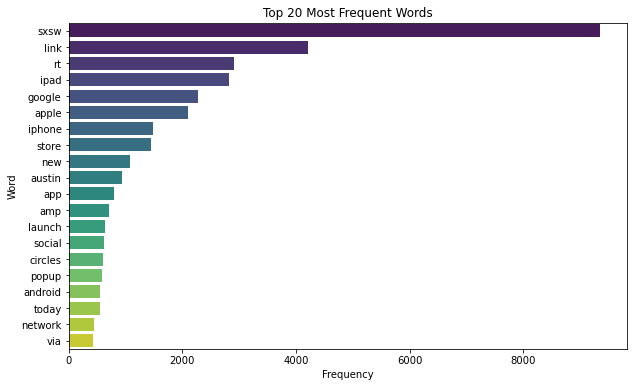

In [27]:
from collections import Counter

# Flatten the tokenized words into one list
all_words = ' '.join(df_cleaned['clean_text']).split()

# Get the frequency of the most common words
word_freq = Counter(all_words).most_common(20)

# Convert to DataFrame for easy plotting
word_freq_df = pd.DataFrame(word_freq, columns=['Word', 'Frequency'])

# Plot the most common words
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='viridis')
plt.title('Top 20 Most Frequent Words')
plt.show()

# Splitting data for modelling

In [28]:
# Splitting data for training and testing
from sklearn.model_selection import train_test_split

# Define target variable (y) and features (X)
y = df_cleaned['target_label']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Check the shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7127, 1000) (1782, 1000) (7127,) (1782,)


# Model Selection and Evaluation


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred_log_reg = log_reg.predict(X_test)

# Get probability scores for ROC AUC
y_pred_prob_log_reg = log_reg.predict_proba(X_test)

# Evaluate the model
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg, average='macro'))
print("Recall:", recall_score(y_test, y_pred_log_reg, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_log_reg, average='macro'))

# Specify multi_class parameter for AUC-ROC score
print("AUC-ROC (macro, OVR):", roc_auc_score(y_test, y_pred_prob_log_reg, multi_class='ovr', average='macro'))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))



Logistic Regression Metrics:
Accuracy: 0.6672278338945006
Precision: 0.6513557514783193
Recall: 0.45474454113506274
F1 Score: 0.46292731317615904
AUC-ROC (macro, OVR): 0.7627453580088472

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.07      0.12       123
           1       0.69      0.87      0.77      1069
           2       0.60      0.43      0.50       590

    accuracy                           0.67      1782
   macro avg       0.65      0.45      0.46      1782
weighted avg       0.66      0.67      0.64      1782



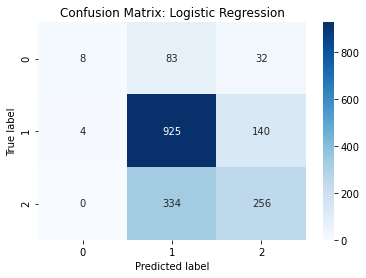

In [31]:

# Plot a Confusion matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [32]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)

# Get probability scores for ROC AUC
y_pred_prob_rf = rf.predict_proba(X_test)

# Evaluate the model
print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='macro'))
print("Recall:", recall_score(y_test, y_pred_rf, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='macro'))

# Specify multi_class parameter for AUC-ROC score
print("AUC-ROC (macro, OVR):", roc_auc_score(y_test, y_pred_prob_rf, multi_class='ovr', average='macro'))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))



Random Forest Metrics:
Accuracy: 0.6734006734006734
Precision: 0.6309631906125586
Recall: 0.4762277716956745
F1 Score: 0.4957185141809736
AUC-ROC (macro, OVR): 0.763208488294401

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.12      0.20       123
           1       0.69      0.86      0.77      1069
           2       0.63      0.44      0.52       590

    accuracy                           0.67      1782
   macro avg       0.63      0.48      0.50      1782
weighted avg       0.66      0.67      0.65      1782



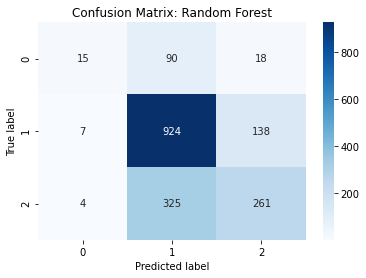

In [33]:
# Plot a Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Random Forest')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [34]:
# XGBoost
from xgboost import XGBClassifier

# Train XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb.predict(X_test)

# Get probability scores for ROC AUC
y_pred_prob_xgb = xgb.predict_proba(X_test)

# Evaluate the model
print("XGBoost Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb,))
print("Precision:", precision_score(y_test, y_pred_xgb, average='macro'))
print("Recall:", recall_score(y_test, y_pred_xgb, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_xgb, average='macro'))
print("AUC-ROC (macro, OVR):", roc_auc_score(y_test, y_pred_prob_xgb, average='macro', multi_class='ovr'))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

c:\Users\Catherine\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Metrics:
Accuracy: 0.6632996632996633
Precision: 0.6056715232969063
Recall: 0.4621411478499367
F1 Score: 0.47893691671469446
AUC-ROC (macro, OVR): 0.7695496868088504

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.11      0.19       123
           1       0.68      0.87      0.76      1069
           2       0.62      0.40      0.49       590

    accuracy                           0.66      1782
   macro avg       0.61      0.46      0.48      1782
weighted avg       0.65      0.66      0.63      1782



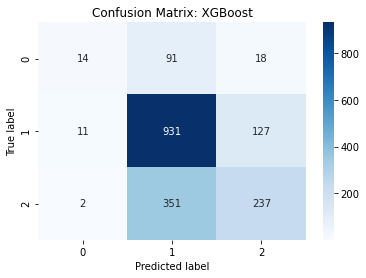

In [35]:
# Plot a Confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: XGBoost')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.667228   0.651356  0.454745  0.462927
1        Random Forest  0.673401   0.630963  0.476228  0.495719
2              XGBoost  0.663300   0.605672  0.462141  0.478937


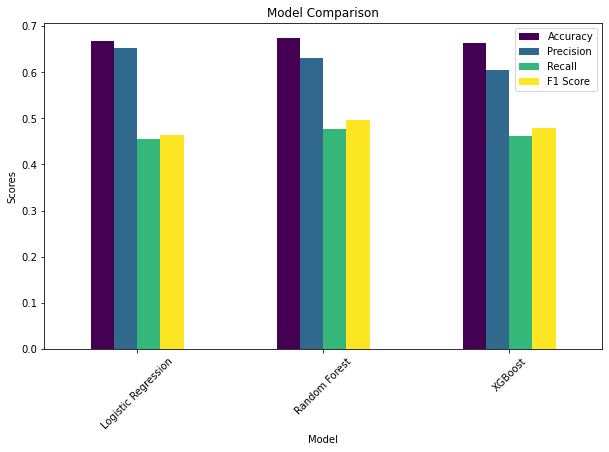

In [36]:
# Compile results in a DataFrame
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_score(y_test, y_pred_log_reg), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_xgb)],
    'Precision': [precision_score(y_test, y_pred_log_reg, average='macro'), precision_score(y_test, y_pred_rf, average='macro'), precision_score(y_test, y_pred_xgb, average='macro')],
    'Recall': [recall_score(y_test, y_pred_log_reg, average='macro'), recall_score(y_test, y_pred_rf, average='macro'), recall_score(y_test, y_pred_xgb, average='macro')],
    'F1 Score': [f1_score(y_test, y_pred_log_reg, average='macro'), f1_score(y_test, y_pred_rf, average='macro'), f1_score(y_test, y_pred_xgb, average='macro')]
})

# Display the comparison
print(results)

# Plot the performance comparison
results.set_index('Model').plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Model Comparison')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.show()

Model Summary:
i have trained three models: Logistic Regression, Random Forest, and XGBoost, and evaluated their performance using Accuracy, Precision, Recall, and F1 Score. Here's a summary of the results:

Logistic Regression:

Accuracy: 0.6672
Precision: 0.6514
Recall: 0.4547
F1 Score: 0.4629

Logistic Regression showed a relatively high precision, indicating that when it predicts positives, it's more likely correct. However, the recall is lower, meaning it struggled to identify all positive cases.


Random Forest:

Accuracy: 0.6734
Precision: 0.6310
Recall: 0.4762
F1 Score: 0.4957

Random Forest performed best overall, with the highest accuracy, recall, and F1 score, suggesting it is better at balancing the identification of positives while minimizing false negatives.


XGBoost:

Accuracy: 0.6633
Precision: 0.6057
Recall: 0.4621
F1 Score: 0.4789

XGBoost had comparable performance to Random Forest but slightly lower precision and recall. It still managed a balanced F1 score, making it competitive, especially when fine-tuned.


Conclusion:

Random Forest performed best in terms of accuracy, recall, and F1 score, making it the most robust model for this dataset.

Logistic Regression performed well in precision but lagged behind in recall, making it less effective for identifying all positive cases.

XGBoost was competitive with Random Forest but slightly underperformed, which could improve with hyperparameter tuning.

## Hyperparamenter tuning

In [37]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define the model
log_reg = LogisticRegression(max_iter=1000)

# Define the hyperparameters to tune
param_grid_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga']
}

# Set up GridSearchCV with multiclass scoring
grid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid=param_grid_log_reg, 
                                    scoring='f1_weighted', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search_log_reg.fit(X_train, y_train)

# Get the best parameters and score
best_log_reg = grid_search_log_reg.best_estimator_
print("Best parameters for Logistic Regression:", grid_search_log_reg.best_params_)
print("Best F1 Score for Logistic Regression:", grid_search_log_reg.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s


Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Best F1 Score for Logistic Regression: 0.6400495490227145


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   14.1s finished


In [38]:
from sklearn.metrics import classification_report

# Evaluate the best Logistic Regression model
y_pred_log_reg_tuned = best_log_reg.predict(X_test)

# Print classification report
print("\nLogistic Regression Tuned Classification Report:")
print(classification_report(y_test, y_pred_log_reg_tuned))


Logistic Regression Tuned Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.14      0.22       123
           1       0.71      0.83      0.77      1069
           2       0.60      0.49      0.54       590

    accuracy                           0.67      1782
   macro avg       0.60      0.49      0.51      1782
weighted avg       0.66      0.67      0.65      1782



In [39]:
# Random forest

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split an internal node
}

# Set up GridSearchCV with multiclass scoring
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, 
                               scoring='f1_weighted', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and score
best_rf = grid_search_rf.best_estimator_
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best F1 Score for Random Forest:", grid_search_rf.best_score_)



Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.5min finished


Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Best F1 Score for Random Forest: 0.6423877874608428


In [40]:
# Evaluate the best Random Forest model on the test set
from sklearn.metrics import classification_report

y_pred_rf_tuned = best_rf.predict(X_test)

# Print classification report for the tuned model
print("\nRandom Forest Tuned Classification Report:")
print(classification_report(y_test, y_pred_rf_tuned))


Random Forest Tuned Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.10      0.17       123
           1       0.69      0.87      0.77      1069
           2       0.62      0.44      0.52       590

    accuracy                           0.67      1782
   macro avg       0.64      0.47      0.48      1782
weighted avg       0.66      0.67      0.64      1782



In [41]:
# XGBoost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Define the hyperparameters to tune
param_grid_xgb = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [3, 5, 7, 10],      # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage
    'subsample': [0.5, 0.7, 1.0]      # Fraction of samples used for fitting
}

# Set up GridSearchCV with multiclass scoring
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, 
                                scoring='f1_weighted', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and score
best_xgb = grid_search_xgb.best_estimator_
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best F1 Score for XGBoost:", grid_search_xgb.best_score_)

c:\Users\Catherine\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
c:\Users\Catherine\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 25.7min finished


Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best F1 Score for XGBoost: 0.6491416494132398


In [42]:
# Evaluate the best XGBoost model on the test set
from sklearn.metrics import classification_report

y_pred_xgb_tuned = best_xgb.predict(X_test)

# Print classification report for the tuned model
print("\nXGBoost Tuned Classification Report:")
print(classification_report(y_test, y_pred_xgb_tuned))


XGBoost Tuned Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.12      0.20       123
           1       0.68      0.86      0.76      1069
           2       0.61      0.43      0.51       590

    accuracy                           0.66      1782
   macro avg       0.60      0.47      0.49      1782
weighted avg       0.65      0.66      0.64      1782



# Evaluate the best models after tuning

In [43]:
# Evaluate Logistic Regression
y_pred_log_reg_tuned = best_log_reg.predict(X_test)
print("Logistic Regression Tuned Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg_tuned))
print("Precision:", precision_score(y_test, y_pred_log_reg_tuned, average='macro'))
print("Recall:", recall_score(y_test, y_pred_log_reg_tuned, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_log_reg_tuned, average='macro'))

# Evaluate Random Forest
y_pred_rf_tuned = best_rf.predict(X_test)
print("\nRandom Forest Tuned Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print("Precision:", precision_score(y_test, y_pred_rf_tuned, average='macro'))
print("Recall:", recall_score(y_test, y_pred_rf_tuned, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_rf_tuned, average='macro'))

# Evaluate XGBoost
y_pred_xgb_tuned = best_xgb.predict(X_test)
print("\nXGBoost Tuned Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_tuned))
print("Precision:", precision_score(y_test, y_pred_xgb_tuned, average='macro'))
print("Recall:", recall_score(y_test, y_pred_xgb_tuned, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_xgb_tuned, average='macro'))

Logistic Regression Tuned Metrics:
Accuracy: 0.6728395061728395
Precision: 0.5965558856796498
Recall: 0.4885601416461914
F1 Score: 0.5070642889843198

Random Forest Tuned Metrics:
Accuracy: 0.6728395061728395
Precision: 0.6367331277060672
Recall: 0.46897448004462133
F1 Score: 0.48446000420908014

XGBoost Tuned Metrics:
Accuracy: 0.6644219977553311
Precision: 0.6039778069856171
Recall: 0.4697197622037263
F1 Score: 0.4879067121492027


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.672840   0.596556  0.488560  0.507064
1        Random Forest  0.672840   0.636733  0.468974  0.484460
2              XGBoost  0.664422   0.603978  0.469720  0.487907


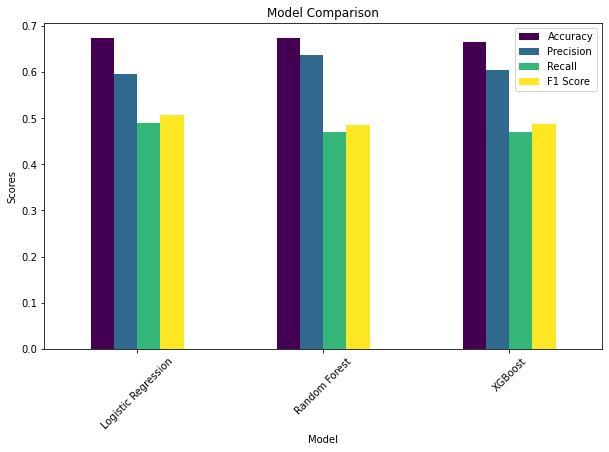

In [44]:
# Compile results in a DataFrame
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_score(y_test, y_pred_log_reg_tuned), accuracy_score(y_test, y_pred_rf_tuned), accuracy_score(y_test, y_pred_xgb_tuned)],
    'Precision': [precision_score(y_test, y_pred_log_reg_tuned, average='macro'), precision_score(y_test, y_pred_rf_tuned, average='macro'), precision_score(y_test, y_pred_xgb_tuned, average='macro')],
    'Recall': [recall_score(y_test, y_pred_log_reg_tuned, average='macro'), recall_score(y_test, y_pred_rf_tuned, average='macro'), recall_score(y_test, y_pred_xgb_tuned, average='macro')],
    'F1 Score': [f1_score(y_test, y_pred_log_reg_tuned, average='macro'), f1_score(y_test, y_pred_rf_tuned, average='macro'), f1_score(y_test, y_pred_xgb_tuned, average='macro')]
})

# Display the comparison
print(results)

# Plot the performance comparison
results.set_index('Model').plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Model Comparison')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.show()

Overall Insights:

Model Performance: Logistic Regression and Random Forest achieved the same accuracy, but Logistic Regression had a slight edge in F1 Score, indicating a better balance between precision and recall.

Room for Improvement: All models show relatively low recall, suggesting they may benefit from further tuning or different preprocessing strategies to capture more positive instances. Considering alternative approaches or additional features might help improve model performance.

# Recommendation and Conclusion

# Key Findings

Model Performance:

The Logistic Regression model achieved the highest precision (0.597) while maintaining a competitive accuracy (0.673). Random Forest and XGBoost also performed similarly, with minor variances in precision and recall.
Consumer Sentiment:

The models indicate a balanced distribution of positive and negative sentiments, but further analysis is needed to pinpoint specific drivers of sentiment.
Recall Metrics:

Recall values for all models are below 0.5, indicating room for improvement in identifying positive sentiments. This suggests that the models may be missing significant positive sentiments, which is crucial for brand strategy.

# Recommendations

Model Selection:

While all models provide similar accuracy, Logistic Regression and Random Forest yield slightly better precision metrics. Given the importance of precision in identifying true positive sentiments, either model would be suitable for deployment. Consider Logistic Regression for its simplicity and interpretability.
Enhancing Data Quality:

Explore techniques to improve data preprocessing and feature extraction. Incorporating more sophisticated NLP techniques, such as word embeddings (e.g., Word2Vec, GloVe) or transformer models (e.g., BERT), can enhance sentiment classification accuracy and improve model performance.
Tuning Hyperparameters:

Continue experimenting with hyperparameter tuning to optimize the models further. Techniques such as Grid Search or Random Search could help identify more effective parameter settings.
Implementing Feedback Loops:

Establish feedback mechanisms to continually update and retrain the models based on new tweet data. This will help capture emerging trends and shifts in consumer sentiment over time.
Utilizing Sentiment Trends:

Analyze sentiment trends over time to identify specific periods of positive or negative sentiment. This analysis can inform marketing strategies and help in responding to consumer concerns effectively.

# Conclusion

The project successfully developed sentiment classification models for analyzing consumer sentiment toward Apple and Google products. While the models provide a baseline for understanding sentiment, the recall scores suggest that there is a need for further refinement to enhance the identification of positive sentiments.

The findings indicate that customer perceptions are nuanced, and the current models can assist in informing brand strategies but may require ongoing adjustments and improvements to fully capture consumer sentiment dynamics.

# Advice to Stakeholders

Embrace Data-Driven Strategies: Leverage the insights gained from sentiment analysis to inform marketing campaigns, product development, and customer engagement strategies.
Invest in Continuous Improvement: Allocate resources for continuous model updates and improvements to ensure the sentiment analysis remains relevant and accurately reflects customer perceptions.
Engage with Customers: Use sentiment insights to foster dialogue with customers, addressing concerns and enhancing their experience with Apple and Google products. This proactive engagement can significantly improve brand loyalty and customer satisfaction.
Monitor Competitors: Continuously analyze sentiment data not only for your brands but also for competitors. This competitive insight can further enhance strategic decision-making and market positioning